<a href="https://colab.research.google.com/github/gilvandrocesardemedeiros/DCA_UFRN_IA/blob/main/CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AVISO PROS CODERS DE PLANTÃO

Eu tava meio de saco cheio quando fiz isso a um tempo, aí tem uns nomes de corno pra variaveis

X_train é diferente de x_train
Y_train é diferente de y_train

e o mesmo vale pro teste


In [1]:
import keras
from keras.datasets import mnist
import numpy as np

In [2]:
#load mnist dataset
(X_trainval, y_trainval), (X_test, Y_test) = mnist.load_data() #everytime loading data won't be so easy :)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
from collections import Counter
Counter(Y_test)

Counter({0: 980,
         1: 1135,
         2: 1032,
         3: 1010,
         4: 982,
         5: 892,
         6: 958,
         7: 1028,
         8: 974,
         9: 1009})

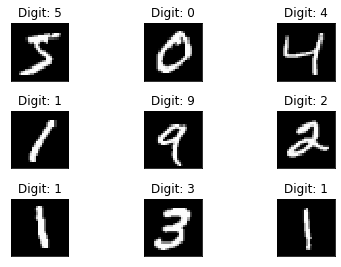

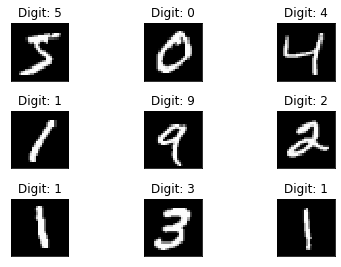

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_trainval[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_trainval[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [5]:
X_trainval = X_trainval.astype('float32')
X_test = X_test.astype('float32')
X_trainval /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_train shape:', X_train.shape)  #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28)


In [6]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_trainval, num_category)
y_test = keras.utils.to_categorical(Y_test, num_category)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.callbacks import TensorBoard
from time import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
X_trainval = np.reshape(X_trainval,(60000,28,28,1))
X_test = np.reshape(X_test,(10000,28,28,1))
print('X_train shape:', X_trainval.shape)
print('X_train shape:', X_test.shape)  #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)
X_train shape: (10000, 28, 28, 1)


In [9]:
x_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [10]:
lenet = Sequential()

#layer 1: C1
lenet.add(keras.layers.Conv2D( filters = 6,
                         kernel_size = (5,5),
                         strides = 1,
                         padding = "same",
                         activation = 'tanh',
                         input_shape=(28,28,1)))

#layer 2: pool

lenet.add(keras.layers.AveragePooling2D(pool_size = (2,2),
                                 strides = (2,2),
                                 padding = 'valid'))

#layer 3: C2

lenet.add(keras.layers.Conv2D( filters = 16,
                         kernel_size = (5,5),
                         strides = (1,1),
                         padding = "valid",
                         activation = 'tanh'))

#layer 4: pool

lenet.add(keras.layers.AveragePooling2D(pool_size = (2,2),
                                 strides = (2,2),
                                 padding = 'valid'))

#layer 5 : flatten

lenet.add(Flatten())

#layer 6: FC

lenet.add(keras.layers.Dense(units = 120, 
                             activation = 'tanh'))

lenet.add(keras.layers.Dense(units = 84, 
                             activation = 'tanh'))

lenet.add(keras.layers.Dense(units = 10, 
                             activation = 'softmax'))



In [11]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [12]:
lenet.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [13]:
EPOCHS = 12
BATCH_SIZE = 32

In [14]:
steps_per_epoch = x_train.shape[0]//BATCH_SIZE
validation_steps = X_valid.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
lenet.fit(x_train, y_train, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
          validation_data=(X_valid,y_valid), validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/12
1500/1500 [==============================] - 38s 4ms/step - loss: 0.4483 - accuracy: 0.8689 - val_loss: 0.1297 - val_accuracy: 0.9618
Epoch 2/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1123 - accuracy: 0.9680 - val_loss: 0.0833 - val_accuracy: 0.9732
Epoch 3/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0815 - val_accuracy: 0.9764
Epoch 4/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0641 - val_accuracy: 0.9791
Epoch 5/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 6/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 7/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0534 - val_accuracy

In [15]:
score = lenet.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0556 - accuracy: 0.9834
Test loss: 0.055647846311330795
Test accuracy: 0.9833999872207642


In [16]:
print("Treino")
predictions = lenet.predict_classes(X_train)
print(confusion_matrix(Y_train,predictions))
print(classification_report(Y_train,predictions))

print("Teste")
predictions = lenet.predict_classes(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

Treino


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[5904    0    2    0    0    4    6    0    7    0]
 [   0 6725    3    0    2    2    2    5    0    3]
 [   1   15 5919   10    0    0    0    7    5    1]
 [   2    1   15 6081    0   14    0    7   10    1]
 [   0    1    2    0 5817    2    3    2    1   14]
 [   5    0    2    9    1 5391    7    0    3    3]
 [   2    1    2    0    2   13 5896    0    2    0]
 [   1    4   11    4    4    0    0 6224    3   14]
 [   1    6    5    7    2   18    6    3 5797    6]
 [   1    1    1    7   29    5    0   13    7 5885]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       0.99      1.00      0.99      5842
           5       0.99      0.99      0.99      5421
           6       1.00      1.00      1.00      5918
           7       0.99      0.99   

In [17]:
#Parte para fazer testes e etc

In [96]:
#load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

In [97]:
#Y_train = Y_train % 3
#Y_test = Y_test % 3

In [98]:
Counter(Y_train)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [99]:
Counter(Y_test)

Counter({0: 980,
         1: 1135,
         2: 1032,
         3: 1010,
         4: 982,
         5: 892,
         6: 958,
         7: 1028,
         8: 974,
         9: 1009})

In [100]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [101]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [102]:
X_train = np.reshape(X_train,(60000,28,28,1))
X_test = np.reshape(X_test,(10000,28,28,1))

In [103]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_category)
y_test = keras.utils.to_categorical(Y_test, num_category)

In [104]:
x_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [112]:
lenet = Sequential()

#layer 1: C1
lenet.add(keras.layers.Conv2D( filters = 2,
                         kernel_size = (8,8),
                         strides = 1,
                         padding = "valid",
                         activation = 'tanh',
                         input_shape=(28,28,1)))

#layer 2: pool

lenet.add(keras.layers.AveragePooling2D(pool_size = (2,2),
                                 strides = 2,
                                 padding = 'valid'))

                        
#layer 3 : flatten

lenet.add(Flatten())

#layer 4: FC

lenet.add(keras.layers.Dense(units = 60, 
                             activation = 'tanh'))

lenet.add(keras.layers.Dense(units = 10, 
                             activation = 'softmax'))



In [113]:
lenet.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 21, 21, 2)         130       
_________________________________________________________________
average_pooling2d_9 (Average (None, 10, 10, 2)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 60)                12060     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                610       
Total params: 12,800
Trainable params: 12,800
Non-trainable params: 0
_________________________________________________________________


In [114]:
lenet.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [115]:
EPOCHS = 12
BATCH_SIZE = 32

In [116]:
steps_per_epoch = x_train.shape[0]//BATCH_SIZE
validation_steps = X_valid.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
lenet.fit(x_train, y_train, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
          validation_data=(X_valid,y_valid), validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5867 - accuracy: 0.8348 - val_loss: 0.1826 - val_accuracy: 0.9479
Epoch 2/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1701 - accuracy: 0.9506 - val_loss: 0.1277 - val_accuracy: 0.9629
Epoch 3/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1190 - accuracy: 0.9645 - val_loss: 0.1059 - val_accuracy: 0.9685
Epoch 4/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0922 - accuracy: 0.9730 - val_loss: 0.0948 - val_accuracy: 0.9706
Epoch 5/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0772 - accuracy: 0.9784 - val_loss: 0.0877 - val_accuracy: 0.9737
Epoch 6/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0670 - accuracy: 0.9803 - val_loss: 0.0806 - val_accuracy: 0.9746
Epoch 7/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0552 - accuracy: 0.9837 - val_loss: 0.0743 - val_accuracy:

In [117]:
score = lenet.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0595 - accuracy: 0.9822
Test loss: 0.05952044203877449
Test accuracy: 0.982200026512146


In [118]:
print("Treino")
predictions = lenet.predict_classes(X_train)
print(confusion_matrix(Y_train,predictions))
print(classification_report(Y_train,predictions))

print("Teste")
predictions = lenet.predict_classes(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

Treino


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[5904    0    3    1    1    2    4    2    5    1]
 [   0 6697    6    4   10    1    4    6   12    2]
 [   9    4 5909    8    4    0    1   12    8    3]
 [   8    0   19 6026    0   36    0    7   18   17]
 [   1    3    4    0 5804    0    9    5    1   15]
 [   7    0    2    2    1 5380   13    1   10    5]
 [  10    1    2    0    7   11 5882    0    5    0]
 [   0   13   18    4    6    1    0 6206    2   15]
 [   8    8    9    6    2   19    9    2 5784    4]
 [   7    6    3    4   43    8    1   27   11 5839]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       1.00      0.98      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.99   